<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_tratam_outlier_excluindo_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [ ]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [2]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [12]:
# Leitura do dataframe:
df_train = pd.read_csv('/train_1.csv')

In [155]:
df_test = pd.read_csv('/test_1.csv')

In [ ]:
df_train.shape

(11033, 63)

[**Python**] - Mostrar as primeiras 5 linhas:

In [ ]:
df_train.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,1,0.015101,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.003945,0.0,0.000138,0.003355,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,9,0.005996,0.019476,0.124770,0.000000,0.010487,0.0,0.029214,0.046445,0.000000,0.018198,0.0,0.138620,0.003186,0.0,0.003121,0.003355,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0125,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,9,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.0,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,4,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.138620,0.000438,0.0,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.1785,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,1,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.0,0.003121,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


### Pré-processamento e transformação dos dados

[**Python**] - Definir os arrays df_X e df_y:




In [156]:
df_X = df_train.copy()
df_X = df_X.drop(columns= ['target','id'])
df_y = df_train['target'].values

In [8]:
df_y

array([ True, False, False, ...,  True, False,  True])

[**Python**] - Normalizar os dados - StandardScaler()

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
#MM = MinMaxScaler()

df_X.drop(columns=['cnae2','md6','md11','mc2','ind01','ind09','ind10','ind11','ind14','ind15','ind16','ind17','ind18','ind28','ind29','ind30','ind38','ind39','ind40','ind41','ind42','ind43'], inplace=True,axis=1)
X_test = df_test.drop(columns=['id','cnae2','md6','md11','mc2','ind01','ind09','ind10','ind11','ind14','ind15','ind16','ind17','ind18','ind28','ind29','ind30','ind38','ind39','ind40','ind41','ind42','ind43'],axis=1)
df_X['rf2'] = df_X['rf2'].astype('category')

In [158]:

X_test['rf2'] = X_test['rf2'].astype('category')
df_X = pd.get_dummies(df_X)
X_test = pd.get_dummies(X_test)
df_X[df_X.columns]= MM.fit_transform(df_X[df_X.columns])
X_test[X_test.columns]= MM.fit_transform(X_test[X_test.columns])
df_X

,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind33,ind34,ind35,ind36,ind37,rf2_0,rf2_1,rf2_2,rf2_3,rf2_4,rf2_5,rf2_6,rf2_7,rf2_8,rf2_9
0,1.000000,0.398255,0.407658,0.114456,0.308309,0.453559,0.384122,0.111722,0.249513,0.393614,1.000000,0.044187,1.000000,0.134934,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.000000,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.546779,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.397077,0.689104,0.844217,0.000000,1.000000,0.809609,0.908028,0.000000,1.000000,1.000000,0.807546,1.000000,1.000000,0.000000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,1.0,0.079279,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000383,0.102683,0.377814,0.080514,0.216878,0.080427,0.362960,0.077037,0.172051,0.352255,0.003804,0.015874,0.062344,0.000000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.000000,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000577,0.513947,0.703152,0.000000,0.000000,0.402548,0.609998,0.000000,0.000000,1.000000,0.111085,0.013452,0.034155,0.000000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.000000,0.0,1.0000,0.2500,0.25,0.9167,0.9167,1.000000,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.012644,0.143017,0.407120,0.039687,0.106904,0.168026,0.438292,0.292442,0.653124,0.421618,0.487878,1.000000,0.214273,0.000000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.000000,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,0.000000,0.042743,0.357057,0.000000,0.069546,0.050218,0.352038,0.000000,0.084978,0.387492,0.096895,0.113808,0.122563,1.000000,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.357311,1.0,0.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,0.1667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11029,0.000190,0.593713,0.767393,0.213546,0.575226,0.465025,0.655740,0.303390,0.677575,1.000000,0.250428,0.329645,0.671443,0.000000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.700280,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11030,0.000287,0.041711,0.356558,0.000000,0.000000,0.042428,0.346334,0.000000,0.000000,0.380933,0.074898,0.130487,0.116727,1.000000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.000000,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11031,0.001408,0.064448,0.367545,0.089361,0.240714,0.378268,0.592221,0.461342,1.000000,0.392521,1.000000,1.000000,0.762388,0.000000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.000000,1.0,1.0000,0.2500,0.25,0.0000,0.0000,1.000000,0.0833,0.0833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_X.shape

(11033, 48)

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [159]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 48); X: Teste=  (1104, 48)


In [160]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [169]:
# Número de Neurônios na Input Layer:
N_I = 48

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 70

N_H2 = 70

N_H3=70

N_H4 = 70

# Função de Ativação da Hidden Layer:
#FA_H = tf.nn.leaky_relu
FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [162]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [170]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 70)                3430      
_________________________________________________________________
dropout_56 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 70)                4970      
_________________________________________________________________
dropout_57 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 70)                4970      
_________________________________________________________________
dropout_58 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 70)              

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [171]:

#Algoritmo_Opt = tf.keras.optimizers.Adam()
Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07
                                        , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function, metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [172]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1674 - binary_accuracy: 0.7675 - val_loss: 0.1585 - val_binary_accuracy: 0.7808
Epoch 2/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1641 - binary_accuracy: 0.7701 - val_loss: 0.1592 - val_binary_accuracy: 0.7808
Epoch 3/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1635 - binary_accuracy: 0.7701 - val_loss: 0.1637 - val_binary_accuracy: 0.7808
Epoch 4/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1629 - binary_accuracy: 0.7701 - val_loss: 0.1558 - val_binary_accuracy: 0.7808
Epoch 5/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1627 - binary_accuracy: 0.7705 - val_loss: 0.1577 - val_binary_accuracy: 0.7808
Epoch 6/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1622 - binary_accuracy: 0.7693 - val_loss: 0.1552 - val_binary_accuracy: 0.7808
Epoch 7/100
311/311 [==============================] - 1s 

In [ ]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history['mse'])
    plt.plot(hist.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [ ]:
Model_Accuracy(hist)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


KeyError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [173]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 995us/step - loss: 0.1575 - binary_accuracy: 0.7808


[0.1575368195772171, 0.7807971239089966]

In [ ]:
#hist2 = RN.fit(df_X, df_y, epochs = 200, callbacks = callbacks)

In [174]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 984us/step - loss: 0.1588 - binary_accuracy: 0.7716


[0.15879134833812714, 0.7715942859649658]

In [175]:
RN.evaluate(X_treinamento, y_treinamento)

311/311 [==============================] - 0s 954us/step - loss: 0.1589 - binary_accuracy: 0.7706


[0.1589309126138687, 0.7705710530281067]

A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


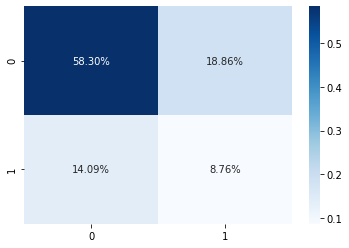

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [176]:
y_teste = RN.predict_classes(X_test)

df_submit = pd.concat([df_test['id'],pd.DataFrame(y_teste,columns=['target']).astype('boolean')],axis=1)

df_submit.to_csv('/PyLadies_NL.csv',index = False, sep = ',')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [177]:
df_submit['target'].value_counts()

False    1000
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.